In [2]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Disabling python warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# pulling data
data = pd.read_csv("C:/Users/Utku/Desktop/Jupyter Notebook/Datathon/03.02.2022 Data Science with Python/olympics_dataset.csv")
data.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
data.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [6]:
# Changing the columns name
data.rename(columns = {"ID"     : 'id',
                       "Name"   : 'name',
                       "Gender" : 'gender',
                       "Age"    : 'age',
                       "Height" : 'height',
                       "Weight" : 'weight',
                       "Team"   : 'team',
                       "NOC"    : 'noc',
                       "Games"  : 'games',
                       "Year"   : 'year',
                       "Season" : 'season',
                       "City"   : 'city',
                       "Sport"  : 'sport',
                       "Event"  : 'event',
                       "Medal"  : 'medal'}, inplace = True)

data.head(2)

,id,name,gender,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [7]:
# Dropping unnecessary columns
data = data.drop(["id", "games"], axis = 1) # axis = 1 means column

data.head(2)

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [10]:
unique_event = pd.unique(data.event)
print(f"Number of the Unique Events: {len(unique_event)}")
unique_event[:10]

Number of the Unique Events: 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [12]:
# looping each event iteratively
# Calculating the means height and weight for the event
# Equating the lost height and weight means to the event means for the event

temporary_data = data.copy() # made a copy to avoid corrupting the real data
height_weight_list = ["height", "weight"]

for e in unique_event:
    
    # event filter
    event_filter = temporary_data.event == e
    # filtering the data for event
    data_filtered = temporary_data[event_filter]
    
    # calculating means of height and weight for event
    
    for s in height_weight_list:
        mean = np.round(np.mean(data_filtered[s]), 2)
        
        if ~np.isnan(mean): # if there is a mean for the event
            data_filtered[s] = data_filtered[s].fillna(mean)
            
        else: # if there is a mean, calculate the mean
            all_data_mean = np.round(np.mean(data[s]), 2)
            data_filtered[s] = data_filtered[s].fillna(all_data_mean)
    
    # syncing the data with missing values filled in the activity to temporary_data
    temporary_data[event_filter] = data_filtered
    
# syncing the data with missing values filled to real data
data = temporary_data.copy()
data.info() # looking at the number of missing values in the height and weight columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    271116 non-null  object 
 1   gender  271116 non-null  object 
 2   age     261642 non-null  float64
 3   height  271116 non-null  float64
 4   weight  271116 non-null  float64
 5   team    271116 non-null  object 
 6   noc     271116 non-null  object 
 7   year    271116 non-null  int64  
 8   season  271116 non-null  object 
 9   city    271116 non-null  object 
 10  sport   271116 non-null  object 
 11  event   271116 non-null  object 
 12  medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [14]:
# Finding missing values on age variable
# Detecting values defined in age variable

age_mean = np.round(np.mean(data.age), 2)
print(f"The average age: {age_mean}")

data["age"] = data["age"].fillna(age_mean)

data.info()

The average age: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    271116 non-null  object 
 1   gender  271116 non-null  object 
 2   age     271116 non-null  float64
 3   height  271116 non-null  float64
 4   weight  271116 non-null  float64
 5   team    271116 non-null  object 
 6   noc     271116 non-null  object 
 7   year    271116 non-null  int64  
 8   season  271116 non-null  object 
 9   city    271116 non-null  object 
 10  sport   271116 non-null  object 
 11  event   271116 non-null  object 
 12  medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


### Extracting the non-medalist atheletes from the dataset

In [15]:
medal_variable = data["medal"]
pd.isnull(medal_variable).sum()

231333

In [16]:
medal_variable_filter = ~pd.isnull(medal_variable)

In [17]:
data = data[medal_variable_filter]
data.head(5)

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    39783 non-null  object 
 1   gender  39783 non-null  object 
 2   age     39783 non-null  float64
 3   height  39783 non-null  float64
 4   weight  39783 non-null  float64
 5   team    39783 non-null  object 
 6   noc     39783 non-null  object 
 7   year    39783 non-null  int64  
 8   season  39783 non-null  object 
 9   city    39783 non-null  object 
 10  sport   39783 non-null  object 
 11  event   39783 non-null  object 
 12  medal   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [19]:
# Saving the dataset for later use
data.to_csv("Cleared_olypmics_dataset.csv", index = False)

In [28]:
# Drawing the histogram graphs

def plotHistogram(variable):
    """
    Input : Variable / Column Name
    Output: Histogram of variable
    """
    plt.figure()
    plt.hist(data[variable], bins = 80, color = "blue")
    plt.xlabel(variable, color = "green")
    plt.ylabel("Frequency", color = "green")
    plt.title(f"Data Frequency - {variable}", color = "green")
    plt.show()

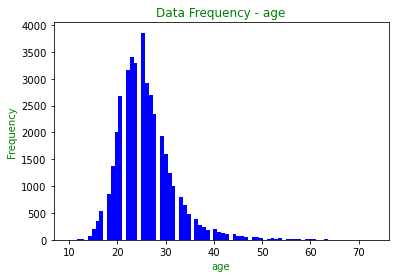

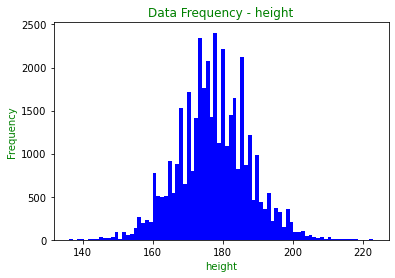

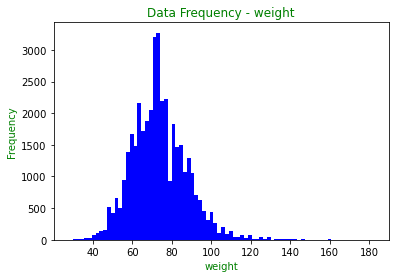

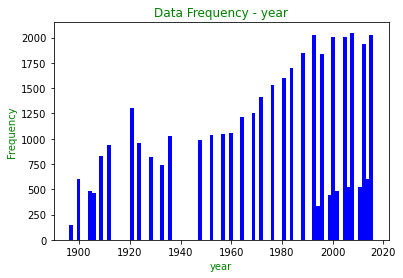

In [29]:
# histogram for all numerical variables

numeric_variable = ["age", "height", "weight", "year"]

for i in numeric_variable:
    plotHistogram(i)

In [30]:
data.describe()

,age,height,weight,year
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000
